# 지역별 평일과 휴일의 데이터 분석

In [1]:
import os
import sys

sys.path.append(os.path.abspath("/content/drive/MyDrive/70sEnt"))

In [2]:
cd /content/drive/MyDrive/70sEnt

/content/drive/MyDrive/70sEnt


# import Package

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from scipy.stats import pearsonr

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [11]:
# matplot lib에서 사용 가능한 한글 폰트
import matplotlib as mpl
plt.rc('font', family='NanumBarunGothic')
#set([i.name for i in mpl.font_manager.fontManager.ttflist])

# 데이터 불러오기

In [12]:
from Preprocessing import data_preprocessing

In [13]:
socar_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/'
weather_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/기상데이터/'
finedust_file_apth='/content/drive/MyDrive/00_Aiffelton/데이터/미세먼지/'
standard_time='time2'

In [ ]:
ts_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location=None)

In [ ]:
ts_df = data_preprocessing.holiday_add(ts_df)

In [ ]:
regionA_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='A')
regionB_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='B')
regionC_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='C')
regionD_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='D')
regionE_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='E')

In [ ]:
regionA_df = data_preprocessing.holiday_add(regionA_df)
regionB_df = data_preprocessing.holiday_add(regionB_df)
regionC_df = data_preprocessing.holiday_add(regionC_df)
regionD_df = data_preprocessing.holiday_add(regionD_df)
regionE_df = data_preprocessing.holiday_add(regionE_df)

# 날짜 컬럼 가공 및 추가

In [19]:
def create_time(df):
  # df['month'] = pd.to_datetime(df['datetime']).dt.month
  # df['day'] = pd.to_datetime(df['datetime']).dt.day
  df['hour'] = pd.to_datetime(df['datetime']).dt.hour
  df['month_day'] = pd.to_datetime(df['datetime']).dt.strftime("%Y-%m-%d")
  # df['weekday'] = pd.to_datetime(df['datetime']).dt.weekday

  # df.loc[df['weekday'] >= 5, 'weekend'] = 1
  # df.loc[df['weekday'] < 5, 'weekend'] = 0
  # df['weekend'] = df['weekend'].astype(int)

In [20]:
create_time(ts_df)

In [22]:
create_time(regionA_df)
create_time(regionB_df)
create_time(regionC_df)
create_time(regionD_df)
create_time(regionE_df)

# 시각화

In [24]:
month_1_15_list = []

for i in ts_df['month_day'].unique():
  if i[8:] == '01':
    month_1_15_list.append(i)
  elif i[8:] == '15':
    month_1_15_list.append(i)

In [39]:
def draw_dayoff(region_name, region_df):
  fig = plt.figure(figsize=(16,10))

  plt.title(region_name + ' 공휴일, 주말별 수요 흐름', fontsize=20)

  ax = sns.lineplot(data=region_df, x='month_day', y='count', marker='o', ci=None, color='skyblue')
  # ax = sns.lineplot(data=region_df[(region_df['weekday']==5) | (region_df['weekday']==6)], x='month_day', y='count', marker='o', ci=None, color='green')
  # ax = sns.lineplot(data=region_df[region_df['holiday']==1], x='month_day', y='count', marker='o', ci=None, color='orange')
  ax = sns.lineplot(data=region_df[region_df['one_dayoff']==1], x='month_day', y='count', marker='o', ci=None, color='red')
  ax = sns.lineplot(data=region_df[region_df['multi_dayoff']!=0], x='month_day', y='count', marker='o', ci=None, color='blue')
  # ax = sns.lineplot(data=region_df[region_df['weekday']==5], x='month_day', y='count', marker='o', ci=None, color='orange')
  # ax = sns.lineplot(data=region_df[region_df['weekday']==6], x='month_day', y='count', marker='o', ci=None, color='black')
  ax = sns.lineplot(data=region_df[(region_df['weekday'] != 5) & (region_df['weekday'] != 6) & (region_df['multi_dayoff'] != 0)], x='month_day', y='count', marker='o', ci=None, color='green')

  ax.set_xticks(month_1_15_list)

  plt.xticks(rotation = 45)
  plt.axis('off')

  plt.legend(['count', '연속되지 않은 공휴일', '연속된 휴일(공휴일, 주말포함)', '연속된 휴일 중 공휴일(주말제외)'], fontsize=14)

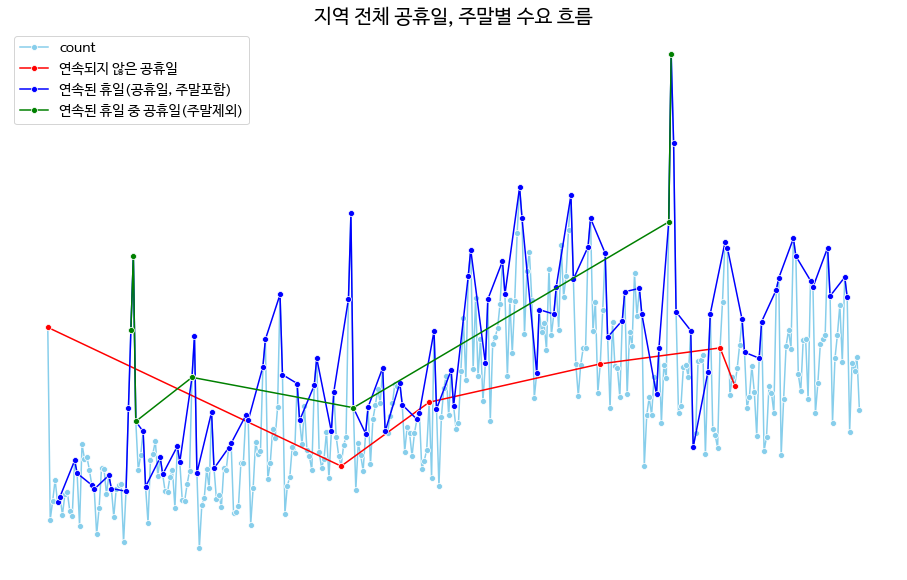

In [40]:
draw_dayoff('지역 전체', ts_df)

- 전체 지역에서 연속된 휴일은 대체로 높은 수요를 가짐
- 전체 지역에서 연속되지 않은 공휴일은 비교적 낮은 수요를 가짐
- 전체 지역에서 1월 1일은 연속되지 않았지만 높은 수요를 가짐
- 연속된 휴일을 feature로 활용해야겠다는 판단을 함

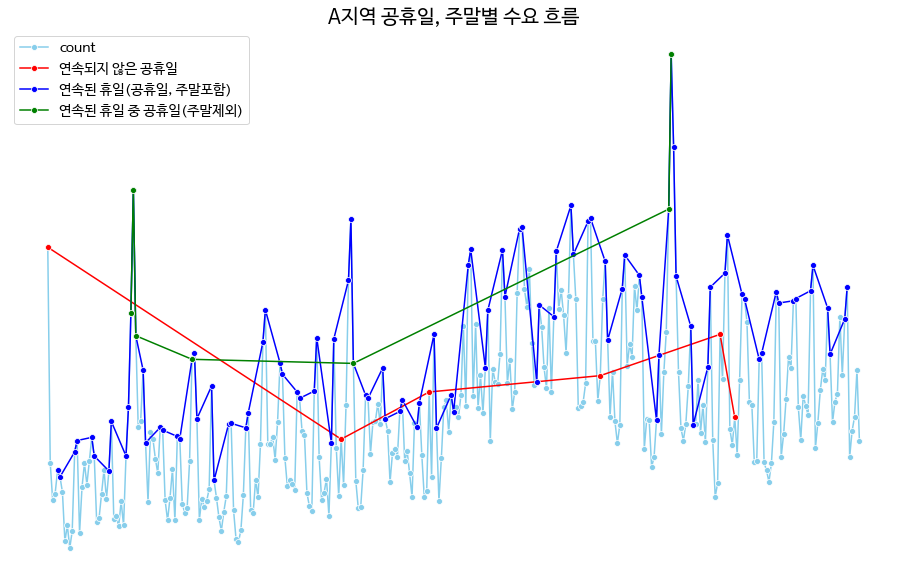

In [41]:
draw_dayoff('A지역', regionA_df)

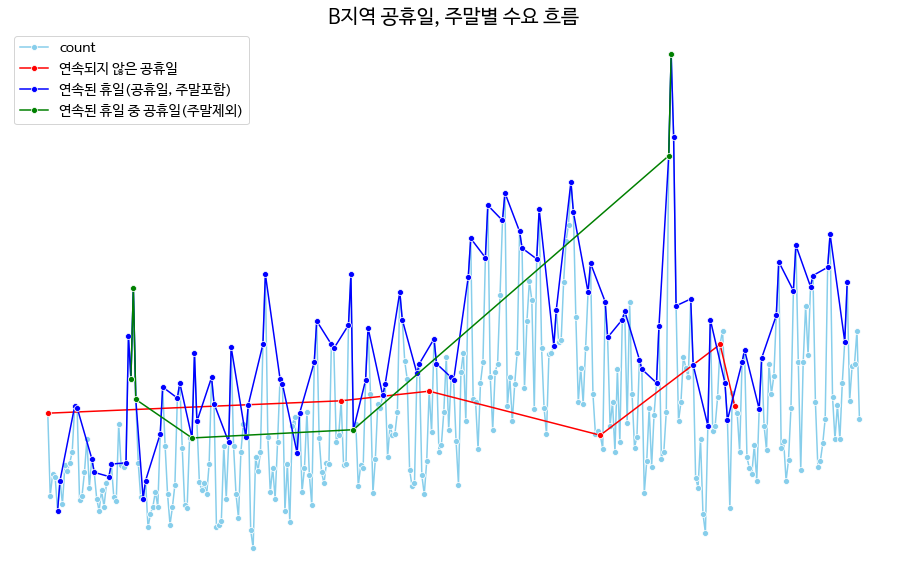

In [42]:
draw_dayoff('B지역', regionB_df)

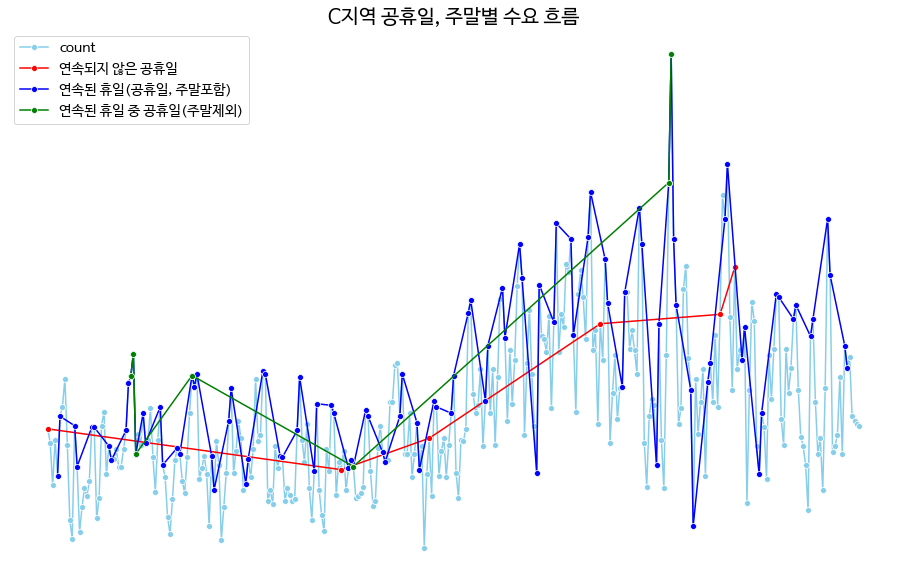

In [43]:
draw_dayoff('C지역', regionC_df)

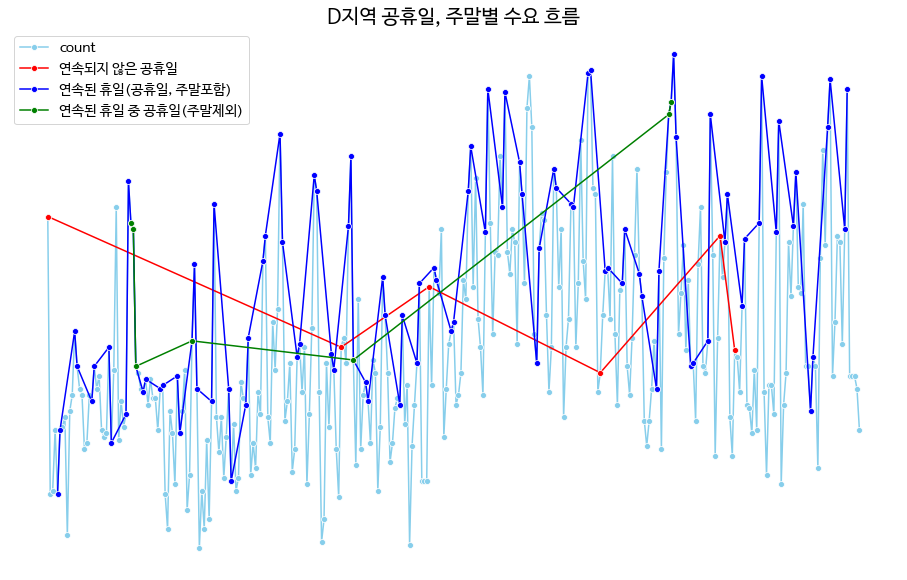

In [44]:
draw_dayoff('D지역', regionD_df)

- 지역 A, B, C, D에서 연속된 휴일은 대체로 높은 수요를 가짐
- 지역 A, B, C, D에서 연속되지 않은 공휴일은 비교적 낮은 수요를 가짐
- 지역 A, B, C, D에서 1월 1일은 연속되지 않았지만 높은 수요를 가짐
- 지역 A, B, C, D의 휴일에 따른 수요는 지역 전체와 비슷한 양상을 보임

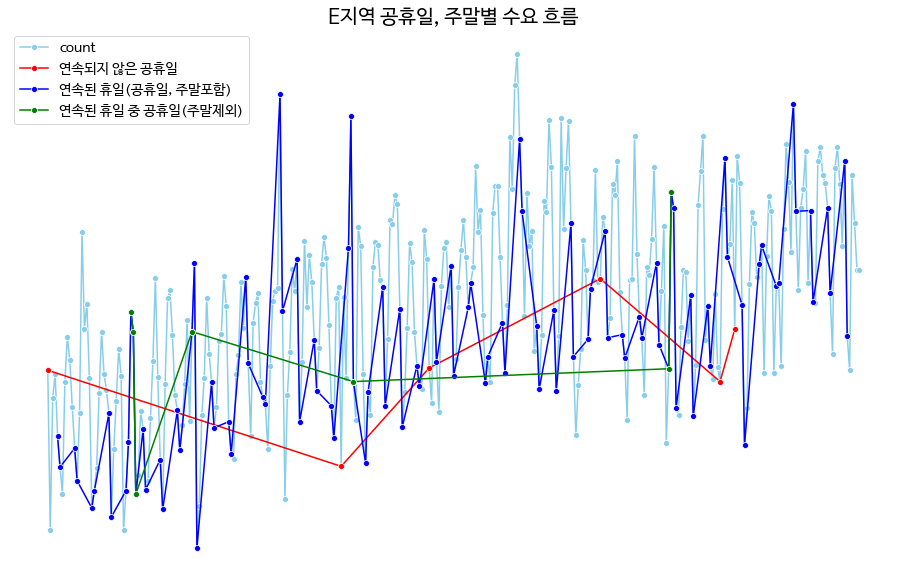

In [45]:
draw_dayoff('E지역', regionE_df)

- 지역 E에서 공휴일은 대체로 낮은 수요를 가짐 (일부는 높은 수요를 보이기도 함)
- 지역 E에서 주말은 대체로 낮은 수요를 가짐 (일부는 높은 수요를 보이기도 함)
- 지역 E에서의 쏘카는 대체로 업무용으로 활용되기 때문에 쉬는 날의 수요는 낮게 보여지는 것으로 판단됨